# Analyze A/B Test Results
###### By Kaspar Lee

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [5]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

---

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

###### a. Read in the dataset and take a look at the top few rows here:

In [6]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


###### b. Use the below cell to find the number of rows in the dataset.

In [7]:
df.shape[0]

294478

###### c. The number of unique users in the dataset.

In [8]:
df['user_id'].nunique()

290584

###### d. The proportion of users converted.

In [9]:
df['converted'].mean()

0.11965919355605512

###### e. The number of times the `new_page` and `treatment` don't line up.

In [10]:
df.query('(group == "treatment" and landing_page == "old_page") or (group == "control" and landing_page == "new_page")')

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0
...,...,...,...,...,...
294014,813406,2017-01-09 06:25:33.223301,treatment,old_page,0
294200,928506,2017-01-13 21:32:10.491309,control,new_page,0
294252,892498,2017-01-22 01:11:10.463211,treatment,old_page,0
294253,886135,2017-01-06 12:49:20.509403,control,new_page,0


###### f. Do any of the rows have missing values?

In [11]:
df.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

---

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

###### a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [12]:
df2 = df.query('(group == "control" and landing_page == "old_page") or (group == "treatment" and landing_page == "new_page")')

In [13]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

---

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

###### a. How many unique **user_id**s are in **df2**?

In [14]:
df2['user_id'].nunique()

290584

###### b. There is one **user_id** repeated in **df2**.  What is it?

In [15]:
vc = df2['user_id'].value_counts()
repeated_uid = vc[vc > 1].index[0]
repeated_uid

773192

###### c. What is the row information for the repeat **user_id**? 

In [16]:
df2.query('user_id == %s' % repeated_uid)

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


###### d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [17]:
df2 = df2.drop_duplicates('user_id')

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

###### a. What is the probability of an individual converting regardless of the page they receive?

In [18]:
df2['converted'].mean()

0.11959708724499628

###### b. Given that an individual was in the `control` group, what is the probability they converted?

In [19]:
obs_rate_old = df2.query('group == "control"')['converted'].mean()
obs_rate_old

0.1203863045004612

###### c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [20]:
obs_rate_new = df2.query('group == "treatment"')['converted'].mean()
obs_rate_new

0.11880806551510564

###### d. What is the probability that an individual received the new page?

In [21]:
df2.query('landing_page == "new_page"').shape[0] / df2.shape[0]

0.5000619442226688

###### e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

The data indicates that the new treatment page on average for the sample converts marginally fewer people than the old page. However, this is only a 0.2% difference and therefore not practically significant.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  

---

`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**$H_{0}$**: **$p_{new} \leq p_{old}$**

**$H_{1}$**: **$p_{new} > p_{old}$**

---

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

###### a. What is the **convert rate** for $p_{new}$ under the null?

In [22]:
p_new = df2['converted'].mean()
p_new

0.11959708724499628

###### b. What is the **convert rate** for $p_{old}$ under the null? 

In [23]:
p_old = df2['converted'].mean()
p_old

0.11959708724499628

###### c. What is $n_{new}$?

In [24]:
n_new = df2.query('landing_page == "new_page"').shape[0]

###### d. What is $n_{old}$?

In [25]:
n_old = df2.query('landing_page == "old_page"').shape[0]

###### e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [26]:
new_page_converted = np.random.choice([0, 1], n_new, p=[p_new, 1 - p_new])

###### f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [27]:
old_page_converted = np.random.choice([0, 1], n_old, p=[p_old, 1 - p_old])

###### g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [28]:
obs_diff = new_page_converted.mean() - old_page_converted.mean()
obs_diff

-0.0008720878727132009

###### h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [29]:
conversion_rate_old = df2.query('landing_page == "old_page"')['converted'].mean()
conversion_rate_new = df2.query('landing_page == "new_page"')['converted'].mean()
original_obs_diff = conversion_rate_new - conversion_rate_old

In [38]:
# Array to store simulated conversion rate differences
p_diffs = []

# Simulate new data for the old and new page (as a binomial distribution)
simulated_conversion_old = np.random.binomial(n_old, p_old, 10000)/n_old
simulated_conversion_new = np.random.binomial(n_new, p_new, 10000)/n_new
    
# Save the difference to p_diffs
p_diffs = simulated_conversion_new - simulated_conversion_old

# Convert to NumPy array
p_diffs = np.array(p_diffs)

###### i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

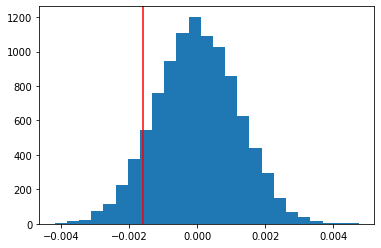

In [39]:
# Plot histogram
plt.hist(p_diffs, bins=25);
plt.axvline(x=original_obs_diff, color='red');

###### j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [186]:
# Calculate conversions rates for the old and new pages
conversion_rate_old = df2.query('landing_page == "old_page"')['converted'].mean()
conversion_rate_new = df2.query('landing_page == "new_page"')['converted'].mean()

# Calculate difference in conversion rate
original_obs_diff = conversion_rate_new - conversion_rate_old

# p-value
p_val = (p_diffs > original_obs_diff).mean()
p_val

0.9069

###### k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

The p-value calculated is 0.9069. This describes the probability of obtaining the observed value (or any more extreme value), assuming that the null hypothesis is true. In this case, it signifies that there is an 90.69% chance that we would observe a difference in conversion rate equal to, or greater than, the difference that was observed.

As this value is extremely large, there is no statistical significance at a 5% significance level, and therefore, there is **no evidence to reject the null hypothesis**. Hence, there is no evidence to suggest that the new page has a better conversion rate than the old page.

###### l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [244]:
import statsmodels.api as sm

# Calculate total number of conversions for the old and new pages
convert_old = df2.query('landing_page == "old_page"').query('converted == 1').shape[0]
convert_new = df2.query('landing_page == "new_page"').query('converted == 1').shape[0]

print(convert_old, convert_new) # Total number of conversions (split by landing page)
print(n_old, n_new)             # Total number of page views (split by landing page)

17489 17264
145274 145310


###### m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [188]:
z_score, p_value_alternative = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
z_score, p_value_alternative

(-1.3109241984234394, 0.9050583127590245)

###### n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The p-value is very similar (0.9051 vs 0.9069), which agrees with the findings using the previous p-value that there is no evidence to reject the null hypothesis, and therefore no evidence to suggest that the new page performs better.

The z-score of 1.31 indicates that the observed value lies 1.31 standard deviations below the mean, which would indicate more than half of the simulated values to lie above this value. This lines up with our large p-value that tells us that 90%+ of the simulated values are greater than the observed value.

<a id='regression'></a>
### Part III - A regression approach

---

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

###### a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression**, as we are predicting binary outcomes (either a user was or was not converted).

###### b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [199]:
# Create A/B page dummy variable (1 for treatment, 0 for control)
df3 = df2.join(pd.get_dummies(df2['group'])['treatment'])
df3 = df3.rename(columns={'treatment': 'ab_page'})

# Add intercept
df3['intercept'] = 1

df3.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


###### c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [212]:
# Create and fit logistic regression model
model = sm.Logit(df3['converted'], df3[['intercept', 'ab_page']])
results = model.fit()

# Output summary
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 11 May 2020   Pseudo R-squ.:               8.077e-06
Time:                        17:43:03   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

###### d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [213]:
# Exponentiate the coefficient of ab_page
1/np.exp(-0.0150)

1.015113064615719

When exponentiating the coefficient of `ab_page`, the model results show us that the new page is 1.015 times **less likely** to result in a conversion, holding all other variables constant.

###### e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?

The p-value associated with `ab_page` is 0.19, which is different to the 0.905 value from earlier, however it is still statistically insignificant at the 5% significance level, therefore indicating that `ab_page` is not useful at predicting the response variable (i.e. conversion rate).

It differs from the value found in Part II because this value was calculated as a two-tailed test, rather than a one-tailed test as was used in Part II. The hypothesis for this test would be:

**$H_{0}$**: **$p_{new} = p_{old}$**

**$H_{1}$**: **$p_{new} \neq p_{old}$**

Whereas in Part II the alternative hypothesis was **$p_{new} > p_{old}$** , to test whether the new conversion is **better** than the old, the hypothesis for the logistic regression only tests is the new conversion rate is **different** to the old. Because these are analysing two different things, this results in differing p-values.

###### f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

The current model only included a single factor, when in reality there are likely more factors that could influence conversion rate, such as page speed, loading time or demographic for example. Adding more factors would make the model better at predicting how each factor affects conversion rates and which ones have a greater impact.

However, any other factors added need to be independent of each, i.e. there needs to be **no multicollinearity** between the new variables used. This can checked by calculating VIFs (Variance Inflation Factor) of the variables. Any with a high VIF (greater than 5) should be dropped from the model.

Additionally, another thing to consider is change aversion and/or the novelty affect, which would give an unfair advantage/disadvantage to the control group if the are existing users of the website.

###### g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [229]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df3.set_index('user_id'), how='inner')

In [232]:
# Create dummy variables for each country
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])

# Create logistic regression model, with US as baseline
model = sm.Logit(df_new['converted'], df_new[['intercept', 'CA', 'UK']])

# Fit and output summary
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Mon, 11 May 2020   Pseudo R-squ.:               1.521e-05
Time:                        18:14:44   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

In [236]:
# Exponentiate the coefficients of CA and UK
print('CA -', 1/np.exp(-0.0408))
print('UK -', np.exp(0.0099))

CA - 1.0416437559600236
UK - 1.0099491671175422


Using these exponentiated coefficients, we can see that users from Canada are 1.04 times **less likely** to convert than the US (baseline), and users from the UK are 1.01 times **more likely** to convert than the US users.

###### h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [242]:
# Create dummy variables for users from each country landing on the new page
# E.g. US_new_page will be 1 if user is from US and on the new page, 0 otherwise
for country in df_new['country'].unique():
    df_new[country + '_new_page'] = df_new[country] * df_new['ab_page']

# Create logistic regression model, with US as baseline
model = sm.Logit(df_new['converted'], df_new[['intercept', 'CA_new_page', 'UK_new_page']])

# Fit and output summary
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Mon, 11 May 2020   Pseudo R-squ.:               2.364e-05
Time:                        18:28:00   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                   0.08085
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      -1.9963      0.006   -322.049      0.000      -2.008      -1.984
CA_new_page    -0.0752      0.038     -1.997      0.046      -0.149      -0.001
UK_new_page     0.0149      0.017      0.862      0.389      -0.019       0.049
===============================================================================
"""

In [243]:
# Exponentiate the coefficients of CA_new_page and UK_new_page
print('CA -', 1/np.exp(-0.0752))
print('UK -', np.exp(0.0149))

CA - 1.0780997492739288
UK - 1.0150115583846535


Using these exponentiated coefficients we can conclude that users from Canada are 1.08 times **less likely** to convert than the US (baseline) when being shown the new landing page, and users from the UK are 1.02 times **more likely** to convert than the US users on the new landing page.

These observed differences are very small, and the p-value for the UK is large (0.0389) therefore that result is not statistically significant. The p-value for Canada however is does show statistical significance at the 5% significance level (0.046), however the practical significance of this is still relatively low.

<a id='conclusions'></a>
## Conclusions

To conclude, overall there was no evidence to suggest that the new page performed better than the old page at converting users.
There was however statistical significance that that the new page has a negative impact on conversion rates for Canadians (vs US users), however the practical significance of this was small enough that we can disregard this result in deciding whether to implement the new page or not.

As there was no other evidence for the new page to be performing better, the e-commerce website should just stick to the old page, as they would not gain anything from switching to the new page.